In [2]:
from classes_V3 import *
plt.rcParams.update({'font.family':'serif'})

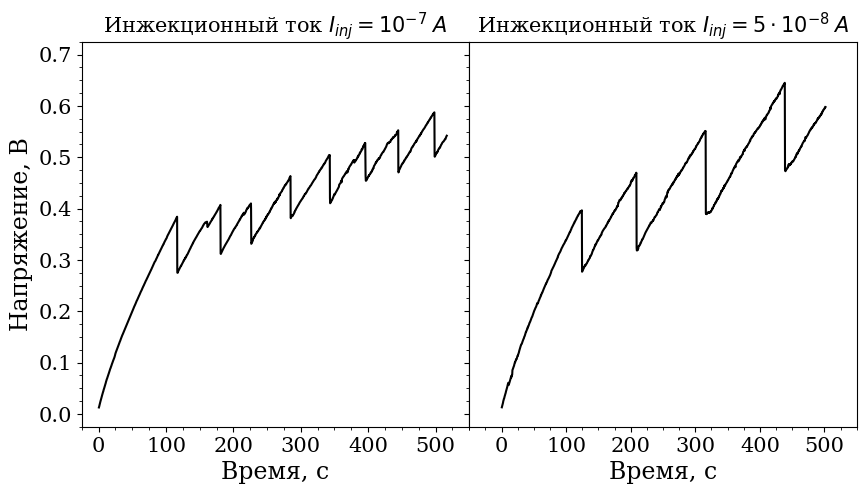

In [22]:
s = pd.read_csv('6.data', delimiter='   ', engine='python', skiprows=13, header=None)
s_1 = pd.read_csv('7.data', delimiter='   ', engine='python', skiprows=13, header=None)

fig = plt.figure(figsize=(10, 5))
gs = GridSpec(ncols=2, nrows=1, figure=fig)
plt.rcParams.update({'font.family':'serif'})
ax_1 = fig.add_subplot(gs[0])
ax_2 = fig.add_subplot(gs[1])

ax_1.plot(s[0][:3000], s[1][:3000], color = 'k')
ax_1.set( xlim=[-25, 550], ylim=[-0.025, 0.725])
ax_1.xaxis.set_major_locator(ticker.MultipleLocator(100))
ax_1.xaxis.set_minor_locator(ticker.MultipleLocator(25))
ax_1.yaxis.set_major_locator(ticker.MultipleLocator(0.1))
ax_1.yaxis.set_minor_locator(ticker.MultipleLocator(0.025))
ax_1.tick_params(labelsize=15)
ax_1.set_ylabel('Напряжение, В', size = 17)
ax_1.set_xlabel('Время, с', size = 17)
ax_1.set_title(r'Инжекционный ток $I_{inj} =  10^{-7} \; A$', size = 15)


ax_2.plot(s_1[0][:3000], s_1[1][:3000], color = 'k')
ax_2.set( xlim=[-50, 550], ylim=[-0.025, 0.725])
ax_2.xaxis.set_major_locator(ticker.MultipleLocator(100))
ax_2.xaxis.set_minor_locator(ticker.MultipleLocator(25))
ax_2.yaxis.set_major_locator(ticker.MultipleLocator(0.1))
ax_2.yaxis.set_minor_locator(ticker.MultipleLocator(0.025))
ax_2.tick_params(labelsize=15)
ax_2.set_xlabel('Время, с', size = 17)
ax_2.tick_params(labelsize=15, labelleft = False)
ax_2.set_title(r'Инжекционный ток $I_{inj} = 5 \cdot 10^{-8} \; A$', size = 15)

gs.update(wspace=0, hspace = 0)

plt.savefig('spiking_real.png', dpi = 300, bbox_inches = 'tight')

Text(0.5, 0, 'Время, с')

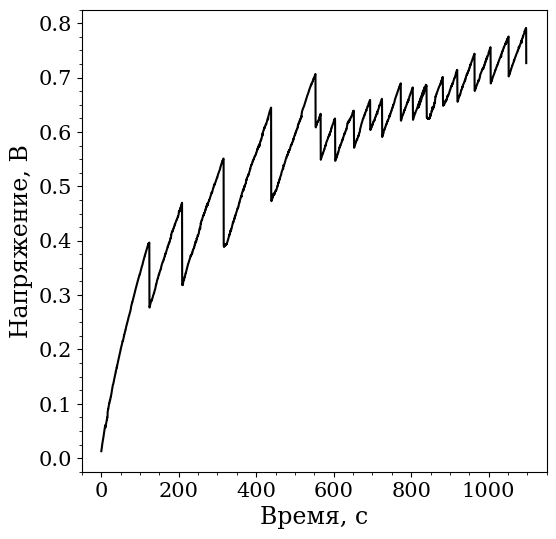

In [4]:
s = pd.read_csv('7.data', delimiter='   ', engine='python', skiprows=13, header=None)
fig, ax = plt.subplots(figsize = [6,6])

ax.plot(s[0], s[1], label = 'Модель', color = 'k')
ax.set( xlim=[-50, 1150], ylim=[-0.025, 0.825])
ax.xaxis.set_major_locator(ticker.MultipleLocator(200))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(50))
ax.yaxis.set_major_locator(ticker.MultipleLocator(0.1))
ax.yaxis.set_minor_locator(ticker.MultipleLocator(0.025))
ax.tick_params(labelsize=15)
ax.set_ylabel('Напряжение, В', size = 17)
ax.set_xlabel('Время, с', size = 17)
#ax.legend(frameon = False, fontsize = 15)

In [5]:
class ThresholdSwitch():
    def __init__(self,  R_off: float = 10_000_000_000, R_on: float = 10_000, V_th: float = 0.3, V_hold: float = 0.05) -> None:
        self.R_off = R_off 
        self.R_on = R_on
        self.V_th =V_th
        self.V_hold =V_hold
        self.state = 'off'

    def get_resistance(self, voltage: float):
        if (self.state == 'off') and ((voltage) < self.V_th):
            return self.R_off
        elif (self.state == 'off') and ((voltage) > self.V_th):
            self.state = 'on'
            return self.R_on
        elif (self.state == 'on') and ((voltage) > self.V_hold):
            return self.R_on
        elif (self.state == 'on') and ((voltage) < self.V_hold):
            self.state = 'off'
            return self.R_off

In [6]:
ts = ThresholdSwitch(R_off=10**9, V_th=0.3)
t  =np.linspace(0, np.pi, 1000)
V = np.sin(2 * t) + np.array([np.random.normal(0,0.005) for _ in t])
I = np.array([V[i] / ts.get_resistance(V[i]) for i in range(len(t))])

In [7]:
t = np.linspace(0, 10, 10000)
dt = t[1] - t[0]
I_inj = 1e-7
V_0 = 0.1
ts = ThresholdSwitch(V_hold=0.01, V_th=0.4, R_off=5e10, R_on=3e4)
R_m = [ts.get_resistance(0)]
C_m = 1e-6
V = [0]
r = [ts.get_resistance(0)]
for i in range(len(t)-1):
    V.append((I_inj - (V[i] - V_0) / ts.get_resistance(V[i] - V_0)) * dt / C_m + V[i])
    r.append(ts.get_resistance(V[i] - V_0))

I_r = np.array(V) / np.array(r)

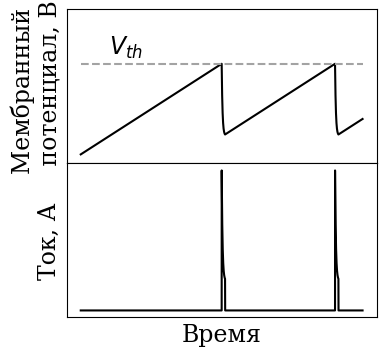

In [8]:
fig = plt.figure(figsize=(4, 4))
gs = GridSpec(ncols=1, nrows=2, figure=fig)
gs.update(hspace = 0)

ax_1 = fig.add_subplot(gs[0])
ax_2 = fig.add_subplot(gs[1])

ax_1.plot(t, V, color = 'k', linewidth = 1.5)
ax_1.tick_params(left = False, labelleft = False, bottom = False, labelbottom = False)
ax_1.set_ylabel('Мембранный \n потенциал, В', size = 17)
ax_1.set(ylim=[-0.05, 0.8])
ax_1.plot([0,10], [0.5,0.5], color = '#a3a3a3', linestyle = 'dashed')
ax_1.text(1, 0.55, r'$V_{th}$', size = 17)



ax_2.plot(t, I_r, color = 'k', linewidth = 1.5)
ax_2.tick_params(left = False, labelleft = False, bottom = False, labelbottom = False)
ax_2.set_xlabel('Время', size = 17)
ax_2.set_ylabel('Ток, А', size = 17)

plt.savefig('spikes.png', dpi = 300, bbox_inches = 'tight')

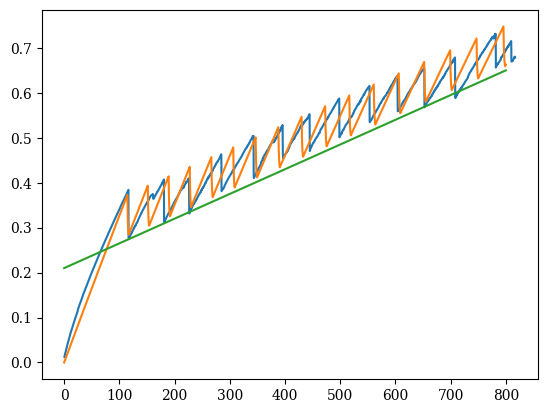

In [9]:
t = np.linspace(0, 800, 10000)
dt = t[1] - t[0]
I_inj = 1e-7
V_0 = [0.21]
ts = ThresholdSwitch(V_hold=0.01, V_th=0.1, R_off=5e10, R_on=3e4)
R_m = [ts.get_resistance(0)]
C_m = [3e-5]
V = [0]
r = [ts.get_resistance(0)]
for i in range(len(t)-1):
    V.append((I_inj - (V[i] - V_0[i]) / ts.get_resistance(V[i] - V_0[i])) * dt / C_m[i] + V[i])
    r.append(ts.get_resistance(V[i] - V_0[i]))
    C_m.append(C_m[i] + 1e-9 )
    V_0.append(V_0[i] + 0.000044)

s = pd.read_csv('6.data', delimiter='   ', engine='python', skiprows=13, header=None)
t_6 = t
V_6 = V
V_0_6 = V_0
fig, ax = plt.subplots()
ax.plot(s[0], s[1])
ax.plot(t, V)
ax.plot(t, V_0)

#ax.plot(t, np.sin(0.01*t))

In [10]:
t = np.linspace(0, 700, 10000)
dt = t[1] - t[0]
I_inj = 5e-8
V_0 = [0.16]
ts = ThresholdSwitch(V_hold=0.01, V_th=0.15, R_off=5e10, R_on=3e4)
R_m = [ts.get_resistance(0)]
C_m = [1.3e-5]
V = [0]
r = [ts.get_resistance(0)]
for i in range(len(t)-1):
    V.append((I_inj - (V[i] - V_0[i]) / ts.get_resistance(V[i] - V_0[i])) * dt / C_m[i] + V[i])
    r.append(ts.get_resistance(V[i] - V_0[i]))
    C_m.append(C_m[i]  + 3e-9)#+ 2.8e-9
    V_0.append(V_0[i] + 0.00005)#
t_2 = np.linspace(0, 1100, 10000)
dt_2 = t_2[1] - t_2[0]
I_inj = 5e-8
V_0_2 = [0.32]
ts_2 = ThresholdSwitch(V_hold=0.01, V_th=0.08, R_off=5e10, R_on=3e4)
R_m_2 = [ts_2.get_resistance(0)]
C_m_2 = [3e-5]
V_2 = [0]
r_2 = [ts_2.get_resistance(0)]
for i in range(len(t)-1):
    V_2.append((I_inj - (V_2[i] - V_0_2[i]) / ts_2.get_resistance(V_2[i] - V_0_2[i])) * dt_2 / C_m_2[i] + V_2[i])
    r_2.append(ts_2.get_resistance(V_2[i] - V_0_2[i]))
    C_m_2.append(C_m_2[i])
    V_0_2.append(V_0_2[i] + 0.00004) #
I_c = [C_m[i] * (V[i+1] - V[i])/dt for i in range(len(V) - 1)]
I_r = [(V[i] - V_0[i])/r[i] for i in range(len(V) - 1)]
s = pd.read_csv('7.data', delimiter='   ', engine='python', skiprows=13, header=None)

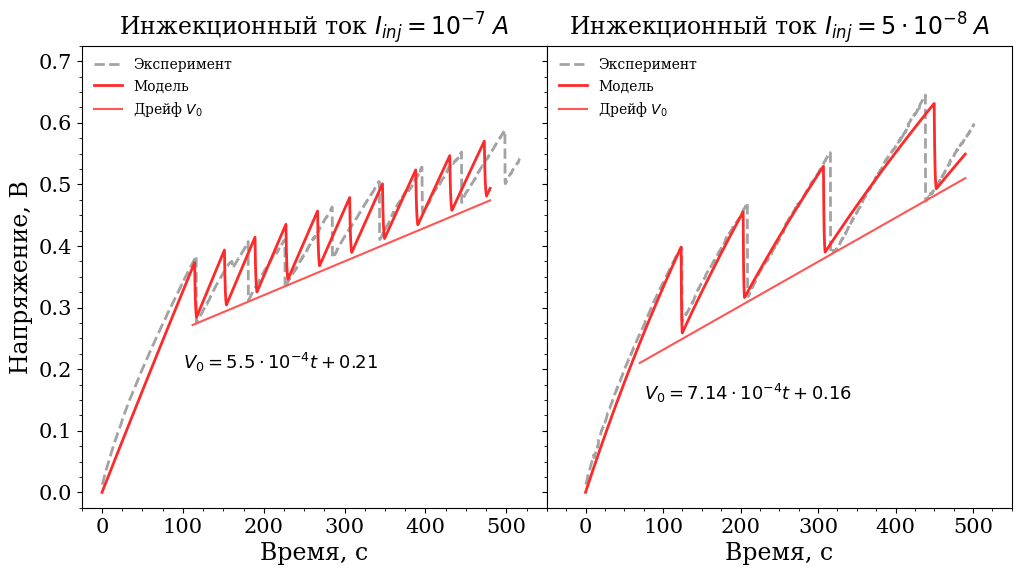

In [39]:
s = pd.read_csv('6.data', delimiter='   ', engine='python', skiprows=13, header=None)
s_1 = pd.read_csv('7.data', delimiter='   ', engine='python', skiprows=13, header=None)

fig = plt.figure(figsize=(12, 6))
gs = GridSpec(ncols=2, nrows=1, figure=fig)
plt.rcParams.update({'font.family':'serif'})
ax_1 = fig.add_subplot(gs[0])
ax_2 = fig.add_subplot(gs[1])

ax_1.plot(s[0][:3000], s[1][:3000], color = '#a3a3a3', linestyle = 'dashed', linewidth = 2, label = 'Эксперимент')
ax_1.plot(t_6[:6000], V_6[:6000], color = '#fe2a2a', label = 'Модель', linewidth = 2)
ax_1.plot(t_6[1400:6000], V_0_6[1400:6000], color = '#ff5555', label = r'Дрейф $V_0$')
ax_1.set( xlim=[-25, 550], ylim=[-0.025, 0.725])
ax_1.xaxis.set_major_locator(ticker.MultipleLocator(100))
ax_1.xaxis.set_minor_locator(ticker.MultipleLocator(25))
ax_1.yaxis.set_major_locator(ticker.MultipleLocator(0.1))
ax_1.yaxis.set_minor_locator(ticker.MultipleLocator(0.025))
ax_1.tick_params(labelsize=15)
ax_1.set_ylabel('Напряжение, В', size = 17)
ax_1.set_xlabel('Время, с', size = 17)
ax_1.set_title(r'Инжекционный ток $I_{inj} =  10^{-7} \; A$', size = 17)
ax_1.legend(frameon = False, fontsize = 10, loc = 'upper left')
ax_1.text(100, 0.2, r'$V_0 = 5.5 \cdot 10^{-4} t + 0.21$', size = 13)


ax_2.plot(s_1[0][:3000], s_1[1][:3000], color = '#a3a3a3', linestyle = 'dashed', linewidth = 2, label = 'Эксперимент')
ax_2.plot(t[:-3000], V[:-3000], color = '#fe2a2a', label = 'Модель', linewidth = 2)
ax_2.plot(t[1000:-3000], V_0[1000:-3000], color = '#ff5555', label = r'Дрейф $V_{0}$')
ax_2.set( xlim=[-50, 550], ylim=[-0.025, 0.725])
ax_2.xaxis.set_major_locator(ticker.MultipleLocator(100))
ax_2.xaxis.set_minor_locator(ticker.MultipleLocator(25))
ax_2.yaxis.set_major_locator(ticker.MultipleLocator(0.1))
ax_2.yaxis.set_minor_locator(ticker.MultipleLocator(0.025))
ax_2.tick_params(labelsize=15)
ax_2.set_xlabel('Время, с', size = 17)
ax_2.tick_params(labelsize=15, labelleft = False)
ax_2.legend(frameon = False, fontsize = 10)
ax_2.set_title(r'Инжекционный ток $I_{inj} = 5 \cdot 10^{-8} \; A$', size = 17)
ax_2.text(75, 0.15, r'$V_{0} = 7.14 \cdot 10^{-4} t + 0.16$', size = 13)
#ax_2.text(75, 0.10, r'$C_{m_{01}} = 4.29 \cdot 10^{-8} t + 1.3 \cdot 10^{-5}$', size = 13)

gs.update(wspace=0, hspace = 0)

plt.savefig('neuron_model.png', dpi = 300, bbox_inches = 'tight')